# Backhand computations for the shoe cover mechanism
## 1 : Computations for the tarp-like mechanism

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.style.use("default")
plt.rcParams['font.size'] = 13
plt.rcParams['axes.linewidth'] = 1.5

(Text(0.5, 0, '$\\alpha$'),
 Text(0, 0.5, 'Force [N]'),
 None,
 <matplotlib.legend.Legend at 0x2591dfb39d0>)

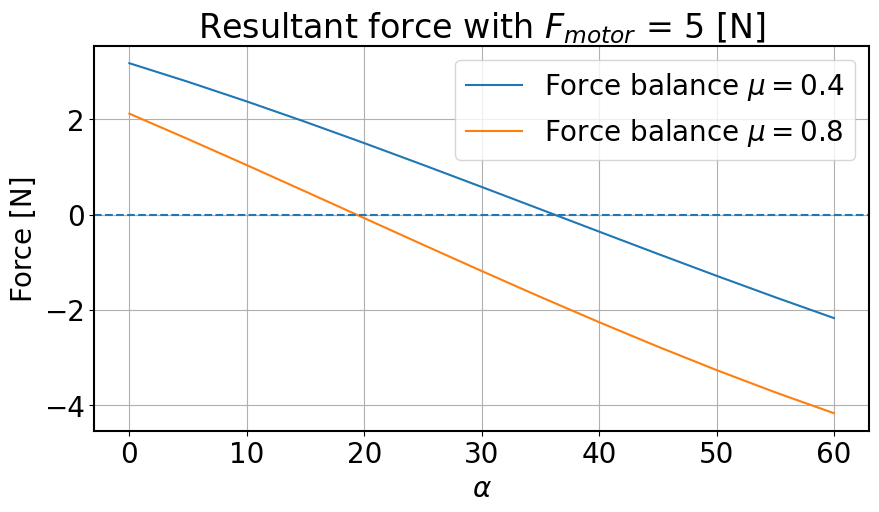

In [30]:
beta = 32
alpha = np.arange(0,65,5)
mu = .4 # Friction coefficient

# Forces
N = lambda alpha, beta, F_motor: F_motor*np.cos(np.deg2rad(90-alpha-beta)) # Normal force
Tau = lambda alpha, beta, F_motor: F_motor*np.sin(np.deg2rad(90-alpha-beta)) # Tangential force 
Ff = lambda mu, N: -mu*N # Frictional force

F_motor = 5 # [N]

# Force balance
balance04 = Tau(alpha,beta,F_motor) + Ff(mu,N(alpha,beta,F_motor))
balance08 = Tau(alpha,beta,F_motor) + Ff(.8,N(alpha,beta,F_motor))

plt.rcParams['font.size'] = 20
plt.figure(figsize=[10,5]), plt.title('Resultant force with $F_{motor}$ = '+str(F_motor)+' [N]')
plt.plot(alpha,balance04, label='Force balance $\mu = 0.4$'), plt.plot(alpha,balance08, label='Force balance $\mu=0.8$')
plt.xlabel(r'$\alpha$'), plt.axhline(linestyle='dashed'), plt.ylabel('Force [N]'), plt.grid(), plt.legend()